In [1]:
#import dependencies
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from collections import Counter
import glob
import os
from progressbar import ProgressBar
pbar = ProgressBar()

In [2]:
#define path for all files in work folder
path = r'' 
all_files = glob.glob(os.path.join(path, "*.csv"))

#create empty dataframe and list for dataframe build
frame = pd.DataFrame()
list_ = []

#loop through all files in work folder, select columns, and convert publish_date column to datetime format
for file_ in pbar(all_files):
    df = pd.read_csv(file_,index_col=None, header=0)
    df_edit = pd.DataFrame(df[['tweet_id',
                               'external_author_id', 
                              'author', 
                              'content', 
                              'region', 
                              'language', 
                              'publish_date',
                              'following', 
                              'followers',
                             'account_type',
                             'account_category',
                             'retweet']])
    df_edit['publish_date'] = df_edit['publish_date'].str.split(' ', expand=True)
    df_edit['publish_date'] = pd.to_datetime(df_edit['publish_date'])
    list_.append(df_edit)

#concat appended list into single data frame
frame = pd.concat(list_)
frame.head()

C:\Users\joshu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\joshu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\joshu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100% |########################################################################|


,tweet_id,external_author_id,author,content,region,language,publish_date,following,followers,account_type,account_category,retweet
0,914580356430536707,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01,1052,9636,Right,RightTroll,0
1,914621840496189440,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,0
2,914623490375979008,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,1
3,914639143690555392,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01,1062,9642,Right,RightTroll,0
4,914312219952861184,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01,1050,9645,Right,RightTroll,1


In [3]:
#categorize publish_date into new column time_period

pre_analysis = frame['publish_date'] < pd.to_datetime('7/1/2015')
before = (frame['publish_date'] > pd.to_datetime('6/30/2015')) & (frame['publish_date'] <= pd.to_datetime('3/1/2016')) 
during = (frame['publish_date'] > pd.to_datetime('3/1/2016'))  & (frame['publish_date'] <= pd.to_datetime('12/1/2016'))
after = (frame['publish_date'] > pd.to_datetime('12/1/2016')) & (frame['publish_date'] <= pd.to_datetime('6/30/2017'))
post_analysis = frame['publish_date'] > pd.to_datetime('7/1/2017')

frame.loc[before, "time_period"] = 'Pre-election'
frame.loc[during, "time_period"] = 'Election season'
frame.loc[after, "time_period"] = 'Post-election'
frame.loc[pre_analysis, "time_period"] = 'Pre-analysis'
frame.loc[post_analysis, "time_period"] = 'Post-analysis'
frame.head()

,tweet_id,external_author_id,author,content,region,language,publish_date,following,followers,account_type,account_category,retweet,time_period
0,914580356430536707,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01,1052,9636,Right,RightTroll,0,Post-analysis
1,914621840496189440,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,0,Post-analysis
2,914623490375979008,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,1,Post-analysis
3,914639143690555392,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01,1062,9642,Right,RightTroll,0,Post-analysis
4,914312219952861184,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01,1050,9645,Right,RightTroll,1,Post-analysis


In [4]:
#get count of time_periods in complete dataframe (total count of rows = 2,945,013)
frame_count = frame['time_period'].value_counts()
frame_count

Pre-election       817992
Election season    816524
Post-election      760125
Post-analysis      382867
Pre-analysis       167505
Name: time_period, dtype: int64

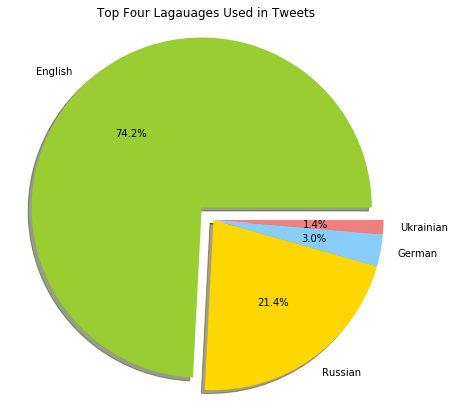

In [28]:
# find and list top 4 language breakdown of tweets
fig = plt.figure(figsize=(7,7))

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
lang_count = frame['language'].value_counts()
lang_count = lang_count.reset_index()

# graph tweets by language
labels = lang_count['index'].head(4)
plt.pie(lang_count['language'].head(4), labels=labels, startangle=0, explode=(0.1, 0, 0, 0), shadow=True, autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.tight_layout
plt.title("Top Four Lagauages Used in Tweets")

fig.savefig("langpie.png", bbox_inches='tight')

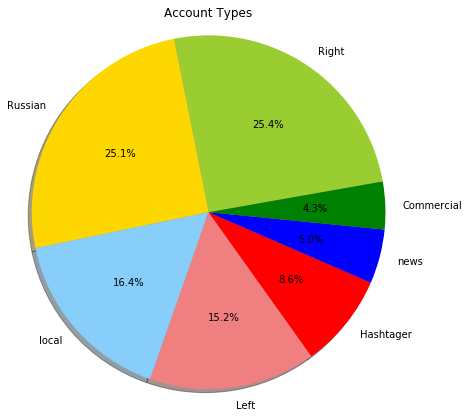

In [29]:
# find and list top 7 account type breakdown of tweets
fig = plt.figure(figsize=(7,7))
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'r', 'blue', 'g']

type_count = frame['account_type'].value_counts()
type_count = type_count.reset_index()


# graph tweets by type
labels = type_count['index'].head(7)
plt.pie(type_count['account_type'].head(7), labels=labels, startangle=10, shadow=True, autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.title("Account Types")

fig.savefig("type.png", bbox_inches='tight')

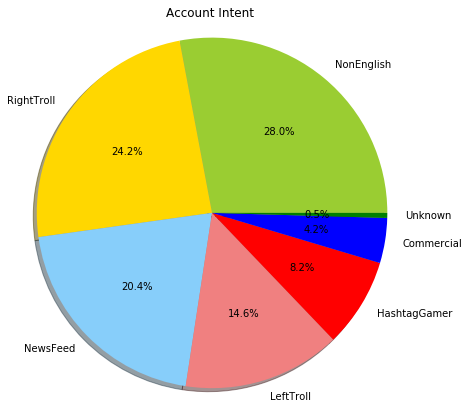

In [30]:
# find and list account category breakdown of tweets
fig = plt.figure(figsize=(7,7))
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'r', 'blue', 'g']
category_count = frame['account_category'].value_counts()
category_count = category_count.reset_index()

# graph tweets by language
labels = category_count['index'].head(7)
plt.pie(category_count['account_category'].head(7), labels=labels, shadow=True, autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.title('Account Intent')
fig.savefig("intentpie.png", bbox_inches='tight')

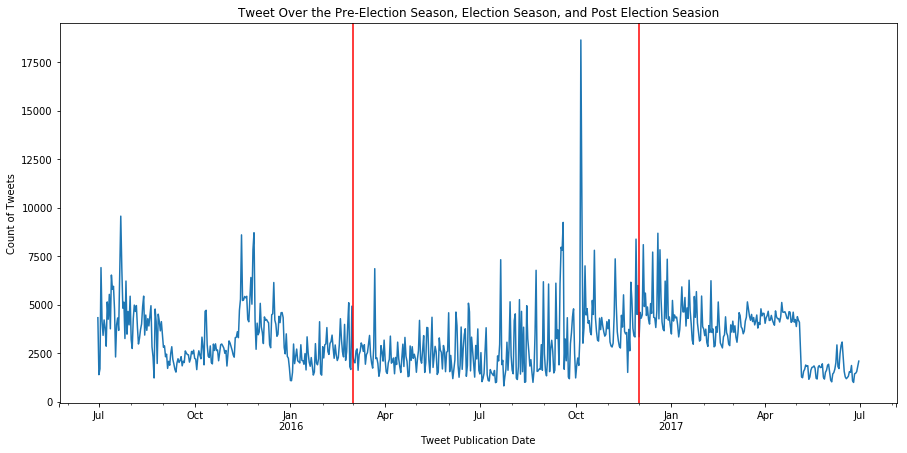

In [31]:
#graph tweets over time
mask = (frame['publish_date'] >= pd.to_datetime('6/30/2015')) & (frame['publish_date'] <= pd.to_datetime('6/30/2017'))
date_frame = frame.loc[mask]

fig, ax = plt.subplots(figsize=(15,7))
date_frame.groupby(['publish_date']).count()['tweet_id'].plot(ax=ax)
plt.title('Tweet Over the Pre-Election Season, Election Season, and Post Election Seasion')
plt.xlabel('Tweet Publication Date')
plt.ylabel('Count of Tweets')
plt.axvline(x=pd.to_datetime('3/1/2016'), color='red')
plt.axvline(x=pd.to_datetime('12/1/2016'), color='red')
fig.savefig('tweets_overtime.png', bbox_inches='tight')


In [8]:
# keep only rows where the language is English
english_troll = frame[frame['language'].str.match('English')]
english_troll.index = pd.RangeIndex(len(english_troll.index))
english_troll.head()

,tweet_id,external_author_id,author,content,region,language,publish_date,following,followers,account_type,account_category,retweet,time_period
0,914580356430536707,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01,1052,9636,Right,RightTroll,0,Post-analysis
1,914621840496189440,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,0,Post-analysis
2,914623490375979008,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01,1054,9637,Right,RightTroll,1,Post-analysis
3,914639143690555392,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01,1062,9642,Right,RightTroll,0,Post-analysis
4,914312219952861184,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01,1050,9645,Right,RightTroll,1,Post-analysis


In [9]:
# find most used words in content


words = english_troll.content.str.split(expand=True).stack()
words = words[words.isin(words)]
#return words.value_counts()


In [10]:
words.value_counts()

to                         541680
the                        456894
in                         385632
of                         325635
a                          289463
for                        242140
and                        219418
is                         209081
on                         184213
I                          156098
#news                      126821
you                        121313
with                       111890
The                        107297
at                         105505
Trump                      104714
RT                          93691
that                        87015
are                         81677
be                          79649
by                          68290
from                        66345
this                        66262
it                          64551
-                           64091
my                          64042
as                          61229
not                         60685
your                        58158
have          

In [11]:
#find hashtag counts

hashtag = (words[words.str.startswith('#')])

#words[words].str.contains('#')
#hashtags.head()

In [26]:
hashtag_df = pd.DataFrame(hashtag)
hashtag_df = hashtag_df.reset_index()
hashtag_df.head()
hdf = pd.DataFrame(hashtag_df[0].value_counts().head(10))
hdf = hdf.reset_index()
h_cols = ['tweet', 'count']
hdf.columns = h_cols
hdf

,tweet,count
0,#news,126821
1,#sports,48329
2,#politics,39622
3,#world,27525
4,#local,25787
5,#TopNews,15135
6,#MAGA,12005
7,#health,11468
8,#tcot,11288
9,#BlackLivesMatter,11117


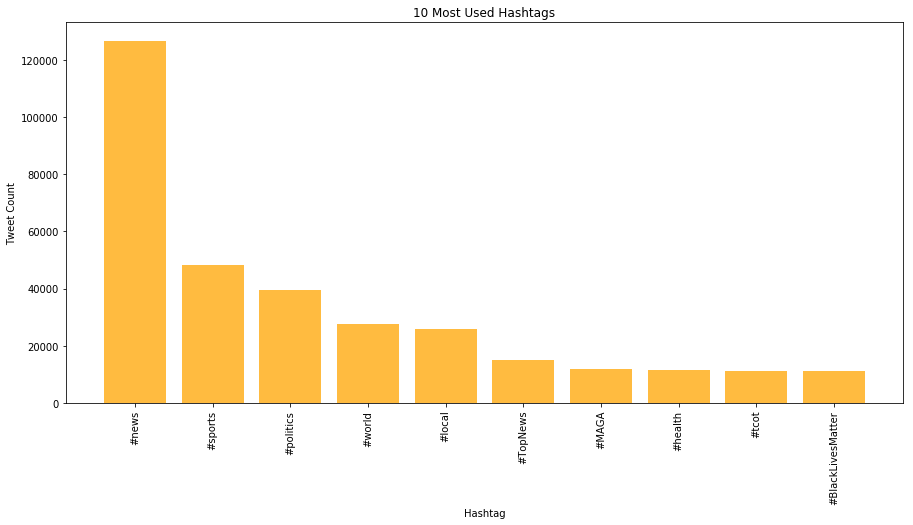

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(hdf['tweet'], hdf['count'], color='orange', alpha=0.75)
plt.xticks(rotation=90)
plt.xlabel('Hashtag')
plt.ylabel('Tweet Count')
plt.title('10 Most Used Hashtags')
fig.savefig("top_tweets.png", bbox_inches='tight')
